In [1]:
#!pip install textblob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from autocorrect import Speller
import unidecode
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from collections import Counter
#import sys  
#!{sys.executable} -m pip install contractions
import contractions

In [3]:
data=pd.read_csv("lsdkDF_PP.csv")
pd.set_option('display.max_colwidth', 100)
data[:23026]

,text,indicator
0,the mathematics of quantum mechanics very accurately describes how our universe works and it tel...,1
1,but physics does tell us what particles can be produced these particles must have just as much m...,1
2,electron also has a neutral partner called the neutrino with no electric charge and a very tiny ...,1
3,circles and other geometrical figures of course when other physicists and i actually work on thi...,1
4,predicting how nature works is a very risky game this theory and others like it are long shots o...,1
...,...,...
10433,this is not like that whole type the word monkey a million times and then it s uh wait you take ...,1
10434,no there is a lot of typewriters right,1
10435,and there is a lot of monkeys and they are all drawing shit in the sand,1
10436,this is really getting embarrassing for both of us,1


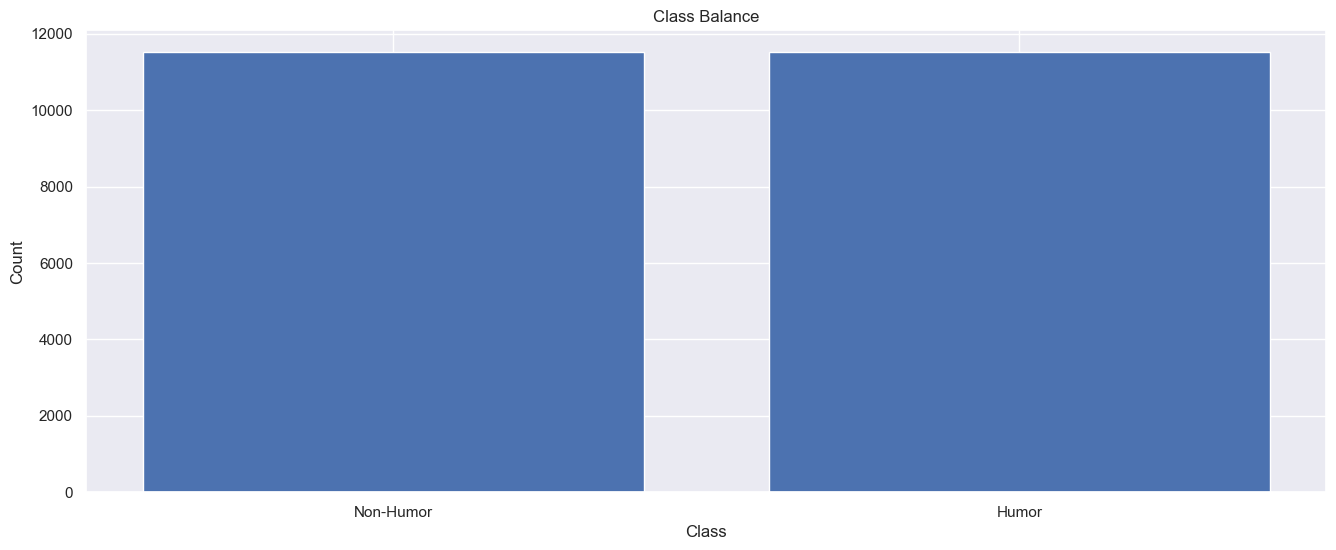

In [20]:
un, count = np.unique(data.indicator, return_counts=True)
plt.bar(["Humor" if i == 1 else "Non-Humor" for i in un], count)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show()

In [40]:
#!pip install git+https://github.com/MCFreddie777/language-check.git
#!pip install pycontractions
from pycontractions import Contractions

#cont = Contractions('GoogleNews-vectors-negative300.bin')
cont = Contractions(api_key="glove-twitter-100")

In [2]:


def case_convert():
    data.text = [i.lower() for i in data.text.values]

def remove_specials():
    data.text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data.text.values]
    data.text = [text.strip() for text in data.text.values]

#def expand_contracted():
#    for text in data.text.values:
#        cont.expand_texts(text)
    
def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.text = texts

def expand_contractions():
    expanded_words = []
    #text = "They'd be like, hey, I drew two by a rectangle using a straightage encompass, isn't that awesome?"
    for text in data.text.values:
        for word in text.split():
            # using contractions.fix to expand the shortened words
            expanded_words.append(contractions.fix(word))  

    expanded_text = ' '.join(expanded_words)
    #print('Original text: ' + text)
    #print('Expanded_text: ' + expanded_text)
    
def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data.text.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
                
def remove_links():
    texts = []
    for text in data.text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.text = texts

def remove_accents():
    data.text = [unidecode.unidecode(text) for text in data.text.values]

def normalize_spaces():
    data.text = [re.sub(r"\s+"," ",text) for text in data.text.values]



In [55]:
remove_shorthands()
#expand_contractions()
case_convert()
remove_links()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()
data

,text,indicator
0,the mathematics of quantum mechanics very accu...,1
1,but physics does tell us what particles can be...,1
2,electron also has a neutral partner called the...,1
3,circles and other geometrical figures of cours...,1
4,predicting how nature works is a very risky ga...,1
...,...,...
10433,this isn t like that whole type the word monke...,1
10434,no there s a lot of typewriters right,1
10435,and there s a lot of monkeys and they re all d...,1
10436,this is really getting embarrassing for both o...,1


In [38]:
list(cont.contract_texts(["I would like to know how I had done that!",
                              "We are not driving to the zoo, it will take too long.",
                              "I have already tried that and i could not figure it out"]))


["I'd like to know how I'd done that!",
 "We aren't driving to the zoo, it'll take too long.",
 "I've already tried that and i couldn't figure it out"]

In [41]:
list(cont.expand_texts(["I'd like to know how I'd done that!",
 "We aren't driving to the zoo, it'll take too long.",
 "I've already tried that and i couldn't figure it out"],precise=True))

ModuleNotFoundError: No module named 'ot'

In [42]:
list(cont.expand_texts(["ain't"]))

ModuleNotFoundError: No module named 'ot'

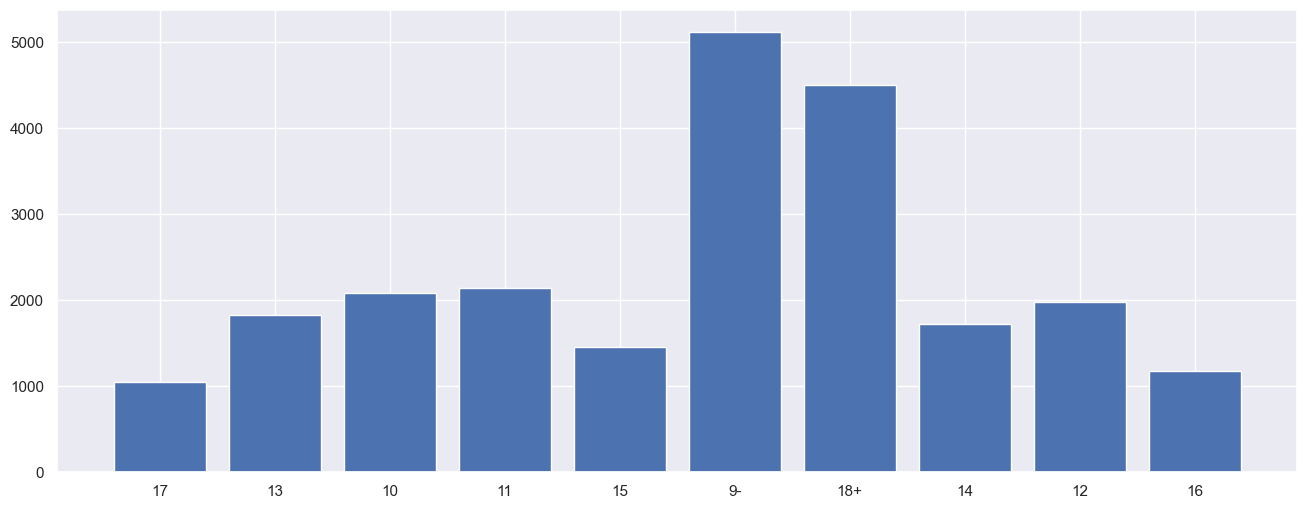

{17: 1040, 13: 1825, 10: 2084, 11: 2142, 15: 1448, '9-': 5119, '18+': 4496, 14: 1720, 12: 1981, 16: 1171}


In [19]:

dataStats = {}

for value in data.text:
    sLen = len(value.split())
    if sLen not in dataStats:
        if sLen < 18:
            if sLen > 9:
                dataStats.update({sLen:1})
            elif "9-" not in dataStats:
                dataStats.update({"9-":1})
            else:
                dataStats["9-"] = dataStats.get("9-",0)+1
        elif "18+" not in dataStats: 
            dataStats.update({"18+":1})
        else:
            dataStats["18+"] = dataStats.get("18+",0)+1
    else:
        dataStats[sLen] = dataStats.get(sLen,0)+1
#count_over_20 = 0
#count_under_20 = 0 
#for key in list(dataStats.keys()):
#    if key > 20:
#        count_over_20 = count_over_20 + dataStats[key]
#    else:
#        count_under_20 = count_under_20 + dataStats[key]
#print(count_over_20)
#print(count_under_20)
names = list(dataStats.keys())
values = list(dataStats.values())

plt.bar(range(len(dataStats)), values, tick_label=names)
plt.show()

print(dataStats)

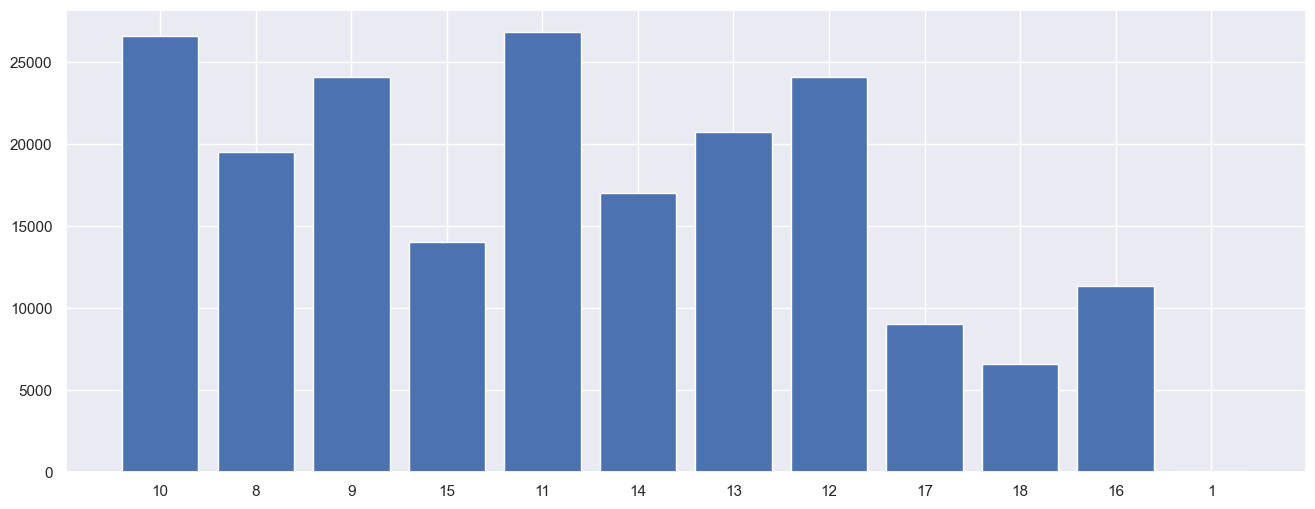

{10: 26589, 8: 19521, 9: 24090, 15: 14055, 11: 26868, 14: 17039, 13: 20760, 12: 24116, 17: 8996, 18: 6612, 16: 11350, 1: 4}


In [21]:
dataCB=pd.read_csv("dataset.csv")

dataStatsCB = {}

for value in dataCB.text:
    sLen = len(value.split())
    if sLen not in dataStatsCB:
        dataStatsCB.update({sLen:1})
    else:
        dataStatsCB[sLen] = dataStatsCB.get(sLen,0)+1
#count_over_20 = 0
#count_under_20 = 0 
#for key in list(dataStatsCB.keys()):
#    if key > 20:
#        count_over_20 = count_over_20 + dataStatsCB[key]
#    else:
#        count_under_20 = count_under_20 + dataStatsCB[key]
#print(count_over_20)
#print(count_under_20)
names = list(dataStatsCB.keys())
values = list(dataStatsCB.values())

plt.bar(range(len(dataStatsCB)), values, tick_label=names)
plt.show()

print(dataStatsCB)

In [4]:
data = pd.read_csv("lsdkDF.csv")
data


,text,indicator
0,the mathematics of quantum mechanics very accu...,1
1,but physics does tell us what particles can be...,1
2,electron also has a neutral partner called the...,1
3,circles and other geometrical figures.of cours...,1
4,predicting how nature works is a very risky ga...,1
...,...,...
10433,This isn't like that whole type the word monke...,1
10434,"No, there's a lot of typewriters, right?",1
10435,And there's a lot of monkeys and they're all d...,1
10436,This is really getting embarrassing for both o...,1


In [62]:

def case_convert():
    data.text = [i.lower() for i in data.text.values]

def remove_specials():
    data.text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data.text.values]
    data.text = [text.strip() for text in data.text.values]

#def expand_contracted():
#    for text in data.text.values:
#        cont.expand_texts(text)
    
def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.text.values:
        text = text.replace("\n","")
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.text = texts

def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data.text.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
                
def remove_links():
    texts = []
    for text in data.text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.text = texts

def remove_accents():
    data.text = [unidecode.unidecode(text) for text in data.text.values]

def normalize_spaces():
    data.text = [re.sub(r"\s+"," ",text) for text in data.text.values]
    
case_convert()
remove_shorthands()
remove_links()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()
#expand_contracted()
data.to_csv("lsdkDF_PP.csv")
data

,text,indicator
0,the mathematics of quantum mechanics very accu...,1
1,but physics does tell us what particles can be...,1
2,electron also has a neutral partner called the...,1
3,circles and other geometrical figures of cours...,1
4,predicting how nature works is a very risky ga...,1
...,...,...
10433,this is not like that whole type the word monk...,1
10434,no there is a lot of typewriters right,1
10435,and there is a lot of monkeys and they are all...,1
10436,this is really getting embarrassing for both o...,1


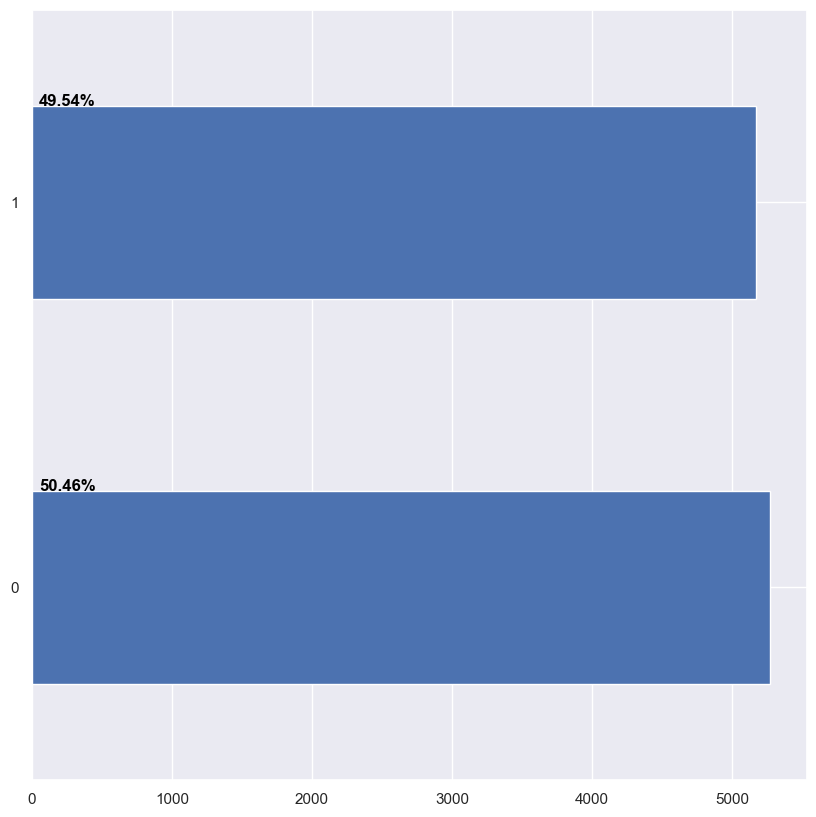

0    5267
1    5171
Name: indicator, dtype: int64

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
per_vals = round(data["indicator"].value_counts(normalize=True,ascending = False)*100, 2)
for i, v in enumerate(per_vals):
    ax.text(v + 3, i + .25, str(v)+"%", color='black', fontweight='bold')
data["indicator"].value_counts(ascending = False).plot.barh(ax = ax)
plt.show()

data.indicator.value_counts()

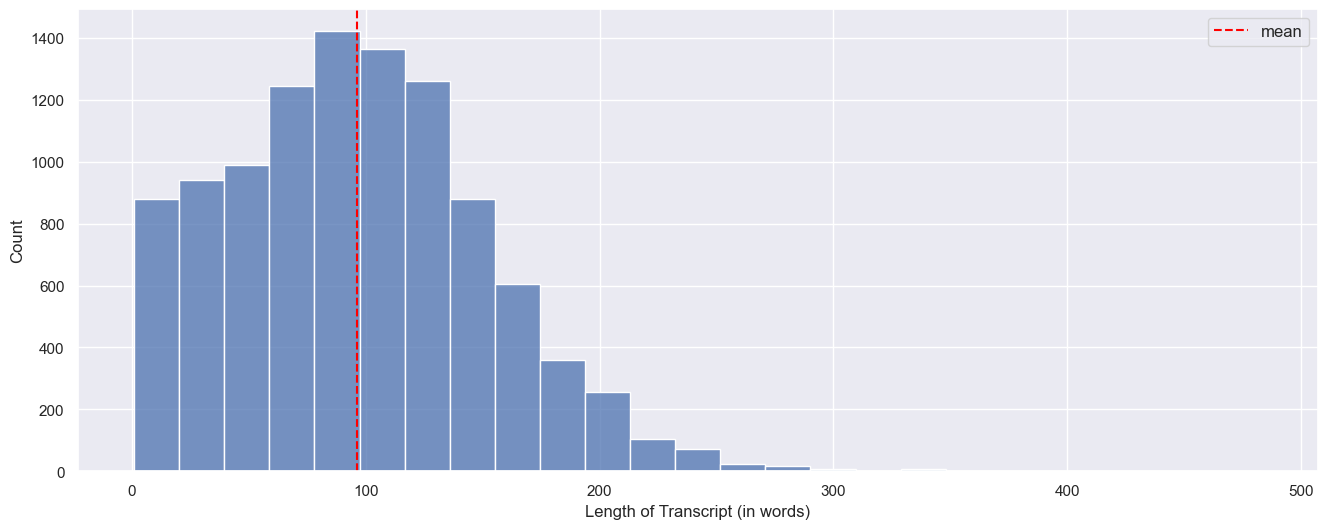

In [25]:
import seaborn as sns
text_lens = []
for index,row in data.iterrows():
#     text_lens.append(len(row["text"]))
    text_lens.append(len([t for t in word_tokenize(row["text"]) if t.isalpha()]))
    
text_lens = np.array(text_lens)
sns.set(rc={'figure.figsize':(16,6)})
fig = sns.histplot(text_lens, kde=False, bins=25)
plt.xlabel('Length of Transcript (in words)')
plt.axvline(x=text_lens.mean(),
            color='red',ls='--', label="mean")
plt.legend(loc='upper right', prop={'size': 12})
plt.show(fig)

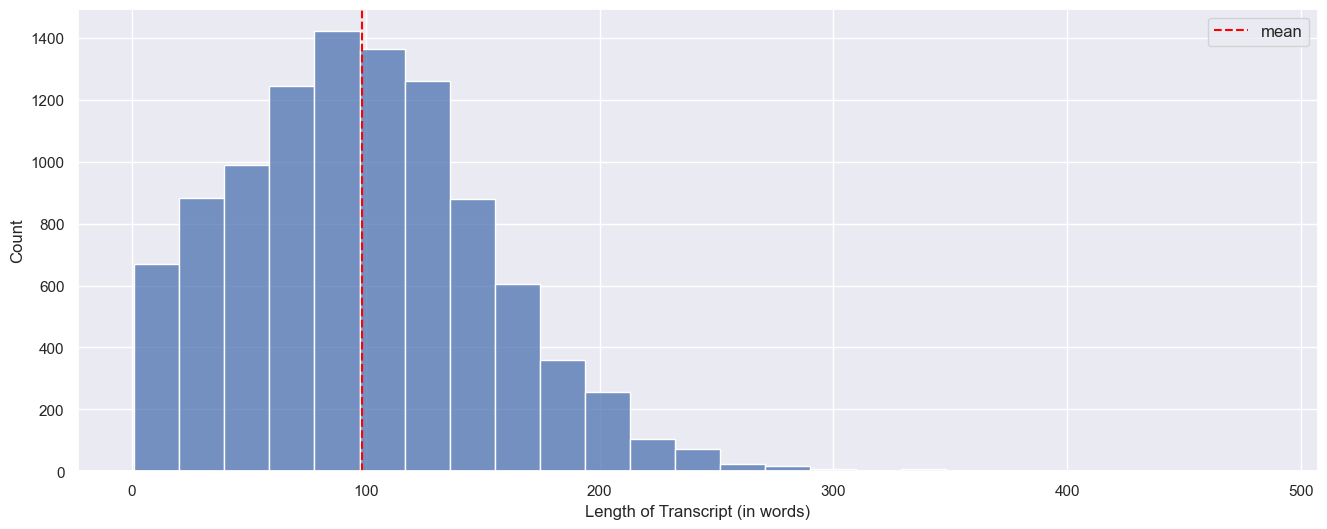

In [26]:
data = data[:10166]
text_lens = []
for index,row in data.iterrows():
#     text_lens.append(len(row["text"]))
    text_lens.append(len([t for t in word_tokenize(row["text"]) if t.isalpha()]))
    
text_lens = np.array(text_lens)
sns.set(rc={'figure.figsize':(16,6)})
fig = sns.histplot(text_lens, kde=False, bins=25)
plt.xlabel('Length of Transcript (in words)')
plt.axvline(x=text_lens.mean(),
            color='red',ls='--', label="mean")
plt.legend(loc='upper right', prop={'size': 12})
plt.show(fig)

In [17]:
nltk.download('omw-1.4')
def word_frequency(sentences):
    # joins all the sentenses
    sentences =' '.join(sentences)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentences)
    lemmatizer = WordNetLemmatizer()
    eng_stopwords = stopwords.words("english")
#     new_tokens = map(lambda token: token.lower(),new_tokens)
#     new_tokens = filter(lambda token: token not in eng_stopwords , new_tokens)
#     new_tokens = filter(lambda token: token.isalpha() , new_tokens)
#     new_tokens = map(lambda token: lemmatizer.lemmatize(token) , new_tokens)
    
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in eng_stopwords]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kyanh\AppData\Roaming\nltk_data...


<Axes: xlabel='frequency', ylabel='trigrams'>

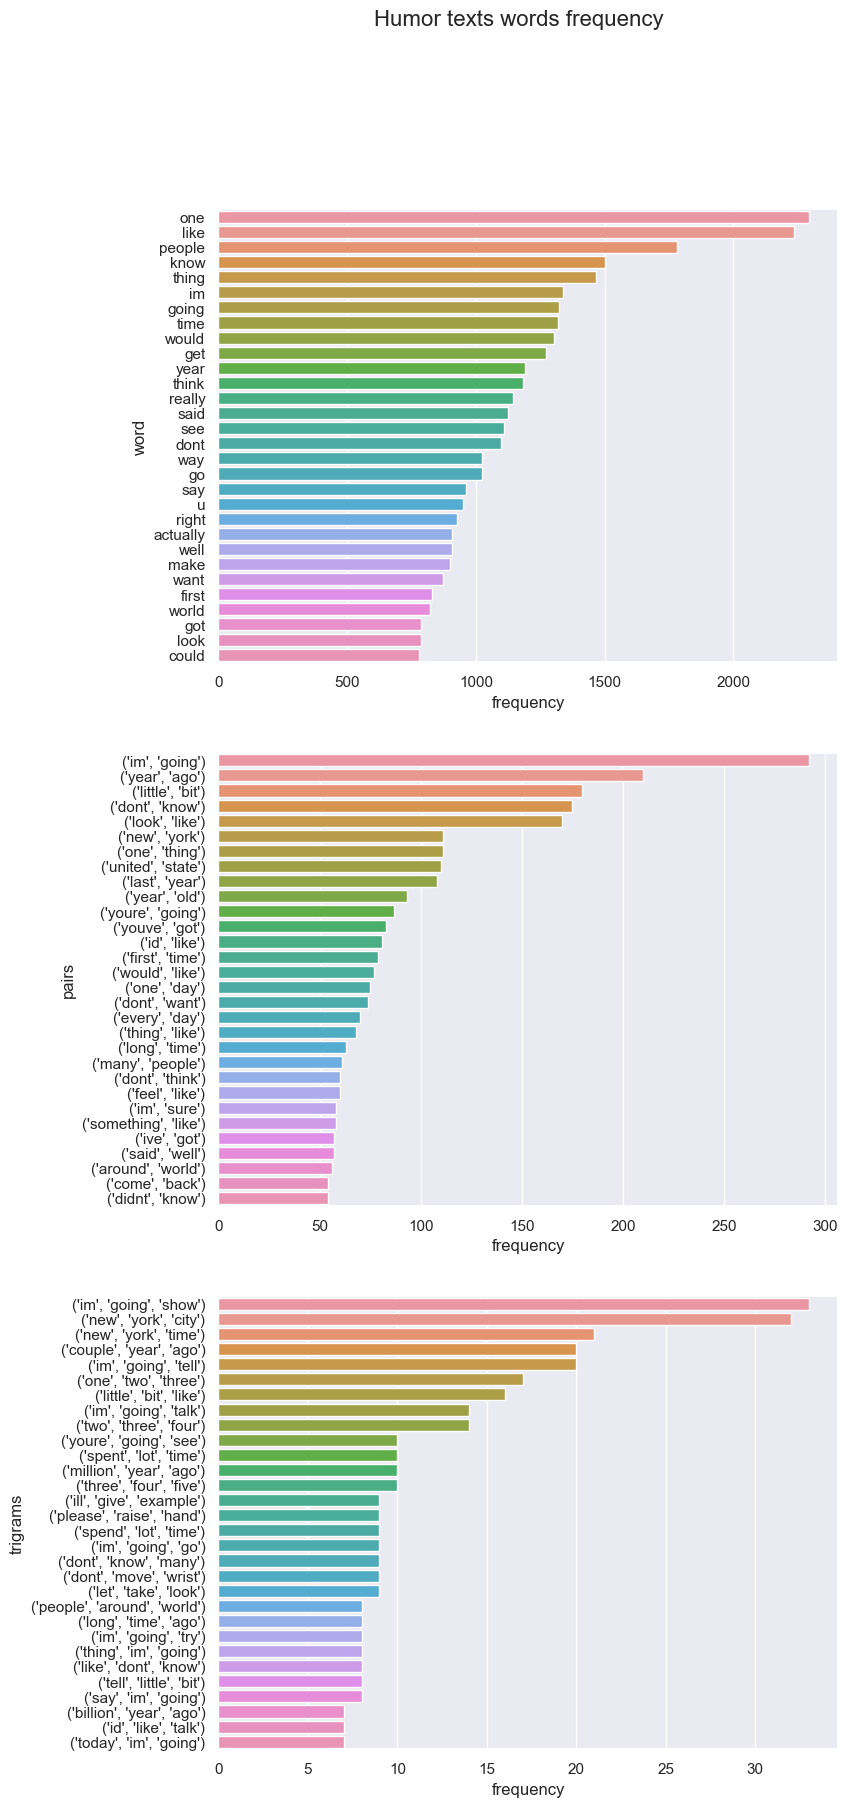

In [21]:
train_df_humor = data[data["indicator"] == 1]
(word_freq,word_pairs,trigrams) = word_frequency(train_df_humor["text"].values.astype("str"))
# create subplot of the different data frames
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,20))
fig.suptitle('Humor texts words frequency', fontsize=16)
sns.barplot(ax=ax1,x='frequency',y='word',data=word_freq.head(30))
sns.barplot(ax=ax2,x='frequency',y='pairs',data=word_pairs.head(30))
sns.barplot(ax=ax3,x='frequency',y='trigrams',data=trigrams.head(30))

<Axes: xlabel='frequency', ylabel='trigrams'>

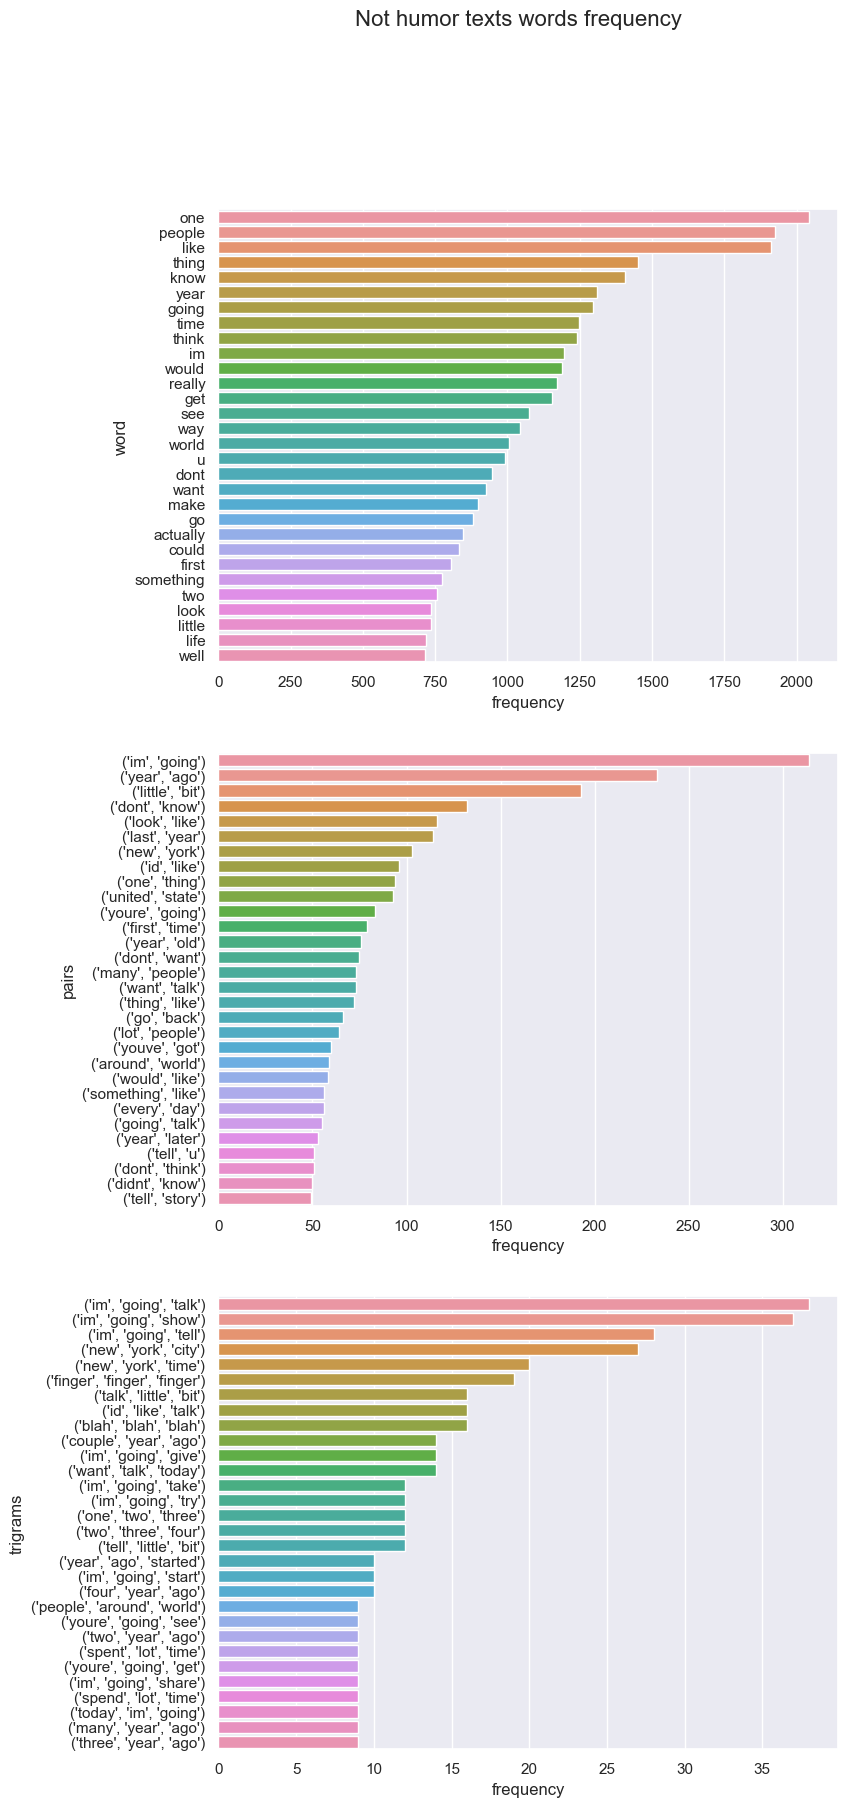

In [33]:
train_df_not_humor = data[data["indicator"] == 0]
(word_freq,word_pairs,trigrams) = word_frequency(train_df_not_humor["text"].values.astype("str"))
# create subplot of the different data frames
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,20))
fig.suptitle('Not humor texts words frequency', fontsize=16)
sns.barplot(ax=ax1,x='frequency',y='word',data=word_freq.head(30))
sns.barplot(ax=ax2,x='frequency',y='pairs',data=word_pairs.head(30))
sns.barplot(ax=ax3,x='frequency',y='trigrams',data=trigrams.head(30))

In [28]:
sentiment = []
for text in data.text.values:
    polarity = TextBlob(text).sentiment.polarity
    if polarity < 0:
        sentiment.append("Negative")
    elif polarity == 0:
        sentiment.append("Neutral")
    else:
        sentiment.append("Positive")
data["sentiment"] = sentiment
del sentiment

C:\Users\kyanh\AppData\Local\Temp\ipykernel_28312\3625207921.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sentiment"] = sentiment


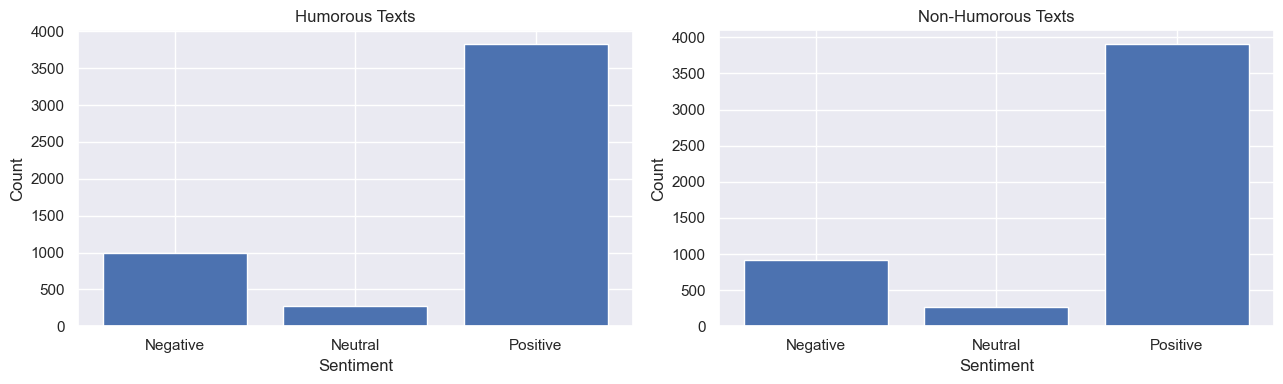

In [29]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
un, count = np.unique(data[data.indicator == 1].sentiment,return_counts=True)
plt.bar(un, count)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Humorous Texts")
plt.subplot(1,2,2)
un, count = np.unique(data[data.indicator == 0].sentiment,return_counts=True)
plt.bar(un, count)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Non-Humorous Texts")
plt.tight_layout()

In [26]:
name = "testDFs/probosis_monkey_DF"
extension = ".csv"
save = name + "_PP"
testdata = pd.read_csv(name+extension)
testdata

,text,humor,pred,result,good,bad,accuracy
0,"This episode is sponsored by CuriosityStream,...",0,False,good,90.0,74.0,0.54878
1,I know what you're thinking.,0,True,bad,NaN,NaN,NaN
2,We're going to laugh at that monkey aren't we?,1,True,good,NaN,NaN,NaN
3,"And yes, we certainly are.",0,False,good,NaN,NaN,NaN
4,But you should know the monkeys are laughing r...,1,True,good,NaN,NaN,NaN
...,...,...,...,...,...,...,...
159,No?,1,True,good,NaN,NaN,NaN
160,"Oh, I've got it.",1,True,good,NaN,NaN,NaN
161,We'll make it look like it's vomiting.,1,True,good,NaN,NaN,NaN
162,Projectile vomiting.,1,True,good,NaN,NaN,NaN


In [3]:


def case_convert():
    testdata.text = [i.lower() for i in testdata.text.values]

def remove_specials():
    testdata.text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in testdata.text.values]
    testdata.text = [text.strip() for text in testdata.text.values]

#def expand_contracted():
#    for text in data.text.values:
#        cont.expand_texts(text)
    
def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in testdata.text.values:
        text = text.replace("\n","")
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    testdata.text = texts

def expand_contractions():
    expanded_words = []
    #text = "They'd be like, hey, I drew two by a rectangle using a straightage encompass, isn't that awesome?"
    for text in testdata.text.values:
        for word in text.split():
            # using contractions.fix to expand the shortened words
            expanded_words.append(contractions.fix(word))  

    expanded_text = ' '.join(expanded_words)
    #print('Original text: ' + text)
    #print('Expanded_text: ' + expanded_text)
    
def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in testdata.text.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
                
def remove_links():
    texts = []
    for text in testdata.text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    testdata.text = texts

def remove_accents():
    testdata.text = [unidecode.unidecode(text) for text in testdata.text.values]

def normalize_spaces():
    testdata.text = [re.sub(r"\s+"," ",text) for text in testdata.text.values]


    


In [27]:
case_convert()
remove_shorthands()
#expand_contractions()
remove_links()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()
testdata.to_csv(save+extension)
testdata = pd.read_csv(save+extension)
testdata

,Unnamed: 0,text,humor,pred,result,good,bad,accuracy
0,0,this episode is sponsored by curiositystream s...,0,False,good,90.0,74.0,0.54878
1,1,i know what you are thinking,0,True,bad,NaN,NaN,NaN
2,2,we are going to laugh at that monkey are not we,1,True,good,NaN,NaN,NaN
3,3,and yes we certainly are,0,False,good,NaN,NaN,NaN
4,4,but you should know the monkeys are laughing r...,1,True,good,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
159,159,no,1,True,good,NaN,NaN,NaN
160,160,oh i have got it,1,True,good,NaN,NaN,NaN
161,161,we will make it look like it is vomiting,1,True,good,NaN,NaN,NaN
162,162,projectile vomiting,1,True,good,NaN,NaN,NaN


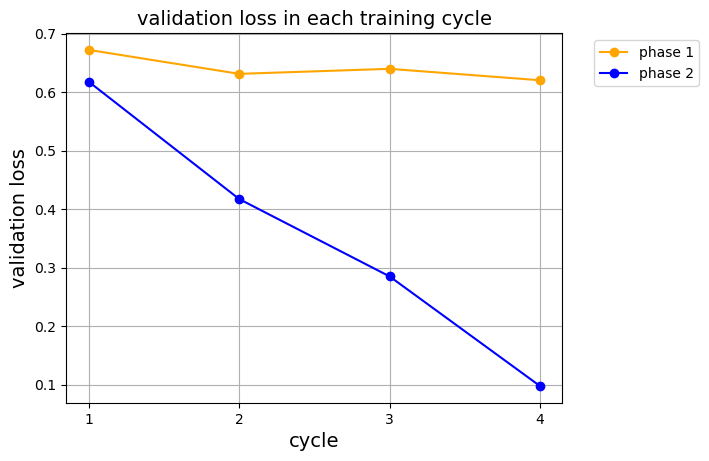

In [46]:
val_loss1 = [0.6721,0.6312,0.6398,0.6203]
val_loss2 = [0.6175,0.4172,0.2851,0.0979]
cycle = ['1','2','3','4']
plt.plot(cycle, val_loss1, color='orange', marker='o')
plt.plot(cycle, val_loss2, color='blue', marker='o')
plt.title('validation loss in each training cycle', fontsize=14)
plt.xlabel('cycle', fontsize=14)
plt.ylabel('validation loss', fontsize=14)
plt.legend(["phase 1", "phase 2"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

<class 'list'>


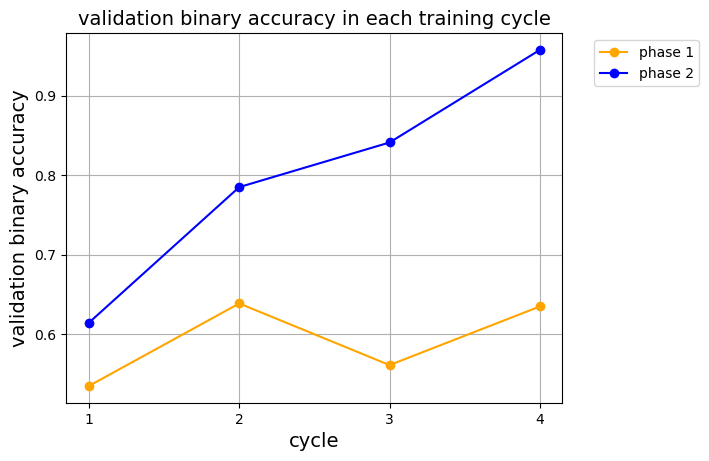

In [45]:
val_bin_acc1 = [0.5349,0.6386,0.5611,0.6348]
val_bin_acc2 = [0.6144,0.7849,0.841,0.9574]
cycle = ['1','2','3','4']
print(type(cycle))
plt.plot(cycle, val_bin_acc1, color='orange', marker='o')
plt.plot(cycle, val_bin_acc2, color='blue', marker='o')
plt.title('validation binary accuracy in each training cycle', fontsize=14)
plt.xlabel('cycle', fontsize=14)
plt.ylabel('validation binary accuracy', fontsize=14)
plt.legend(["phase 1", "phase 2"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

           precision    recall  f1-score
not humor   0.857143  0.987013  0.917505
humor       0.785714  0.224490  0.349206
accuracy    0.853571  0.853571  0.853571


Text(0.5, 1.0, 'Confusion Matrix(Chrome Dinosaur Game)')

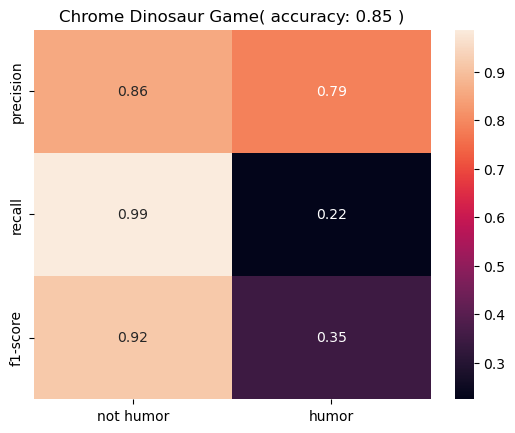

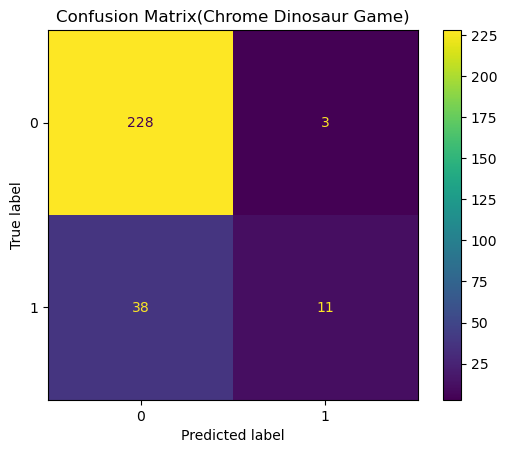

In [4]:
'''"ct_vid2_DF_grouped",'''
dfname = ["eduvids_testset_PP","eduvid_pred1_PP","hippo_facts_DF_PP","howwereopen_vihart_DF_PP","DoSchoolKillsCreativity_DF_PP","np_4thdim_DF_PP","probosis_monkey_DF_PP","ct_vid2_DF_PP"]
vidname = ["Summarized set", "Barnsley Fern", "True Facts: Hippopotamus", "How We Reopen?", "Do schools kill creativity?", "The puzzling Fourth Dimension", "True Facts: Proboscis Monkey","Chrome Dinosaur Game"]
folder = "testDFs/"
version = "(checkpoint1)"
extension = ".csv"
i = 0
data = pd.read_csv("testDFs/"+"ct_vid2_DF_grouped"+"(checkpoint1).csv")
y_true = data["humor"]
y_pred = data["pred"]
report = classification_report(y_true, y_pred,target_names=['not humor','humor'],output_dict=True)
df = pd.DataFrame(report).transpose()
df = df.drop("macro avg")
df = df.drop("weighted avg")
df = df.drop(columns="support")
print(df.head(10))
sns.heatmap(df.iloc[:-1, :].T, annot=True)
plt.title("Chrome Dinosaur Game"+"( accuracy: "+str(round(df["recall"].iloc[2],2))+" )")
cf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
disp.ax_.set_title("Confusion Matrix(" + "Chrome Dinosaur Game" + ")")





#for name in dfname:
#    data = pd.read_csv(folder+name+version+extension)
#    y_true = data["humor"]
#    y_pred = data["pred"]
#    cf_matrix = confusion_matrix(y_true, y_pred)
#    #plt.title("Confusion Matrix(" + vidname[i] + ")")
#    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
#    report = classification_report(y_true, y_pred,output_dict=True)
#    df = pd.DataFrame(report).transpose()
#    df = df.drop("macro avg")
#    df = df.drop("weighted avg")
#    df = df.drop(columns="support")
#    print(df)
#    print("File: "+folder+name+version+extension)
#    print("----------------------------------------------------------------------")
    #disp.plot()
    #disp.ax_.set_title("Confusion Matrix(" + vidname[i] + ")")
#    i=i+1

    #report = classification_report(y_true, y_pred,target_names=['humor','not humor'],output_dict=True)
    #print(report+"-"+vidname[i]+"-"+str(type(report)))
    #df = pd.DataFrame(report).transpose()
    #print(df.head(10))
    #df = pd.DataFrame(report).transpose()
    #df = df.drop("macro avg")
    #df = df.drop("weighted avg")
    #print(df.head(10))
    #sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
    #disp.plot()
    #disp.ax_.set_title("Confusion Matrix(" + vidname[i] + ")")
    #i = i+1
    


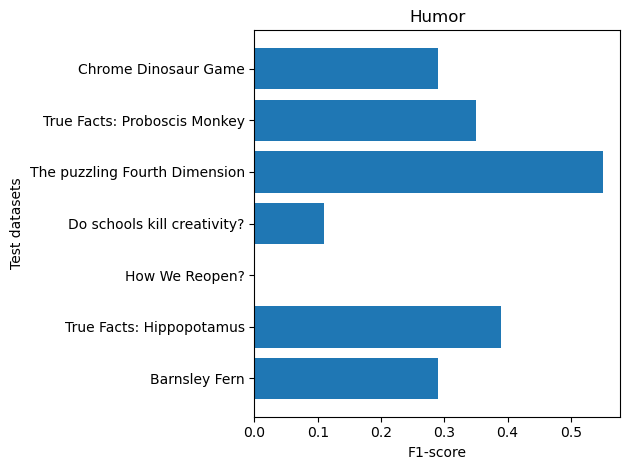

In [6]:
'''F1scores = {"set 1": 0.29,
            "set 2": 0.39,
            "set 3": 0.0,
            "set 4": 0.11,
            "set 5": 0.55,
            "set 6": 0.35,
            "set 7": 0.29}'''
F1scores = [0.29, 0.39, 0.0, 0.11, 0.55, 0.35, 0.29]
accu = [0.82, 0.71, 0.94, 0.78, 0.98, 0.64, 0.83]
vidname = ["Barnsley Fern", "True Facts: Hippopotamus", "How We Reopen?", "Do schools kill creativity?", "The puzzling Fourth Dimension", "True Facts: Proboscis Monkey","Chrome Dinosaur Game"]
plt.barh(vidname, F1scores)
plt.ylabel("Test datasets")
plt.xlabel("F1-score, humor label")
plt.title("Humor")
plt.tight_layout()








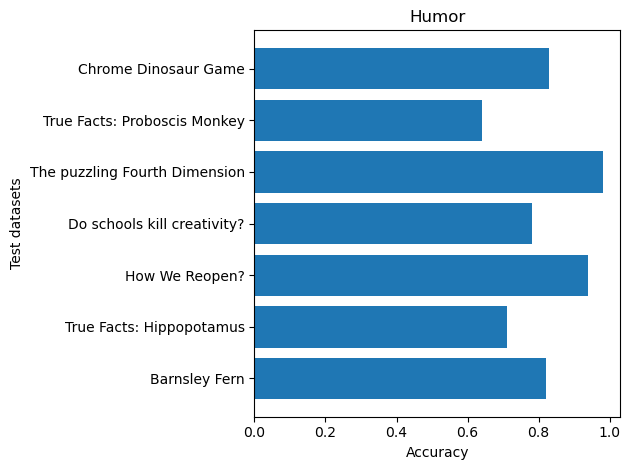

In [3]:
plt.barh(vidname, accu)
plt.ylabel("Test datasets")
plt.xlabel("Accuracy")
plt.title("Humor")
plt.tight_layout()

In [32]:
data = pd.read_csv("testDFs/eduvids_testset_PP(checkpoint1).csv")
data

,text,humor,pred,result,good,bad,precision,accuracy,recall,F1
0,this episode is sponsored by curiositystream s...,False,False,good,1271.0,413.0,0.76,0.75,0.98,0.86
1,i know what you are thinking,False,False,good,NaN,NaN,NaN,NaN,NaN,NaN
2,we re going to laugh at that monkey are not we,True,False,bad,NaN,NaN,NaN,NaN,NaN,NaN
3,and yes we certainly are,False,False,good,NaN,NaN,NaN,NaN,NaN,NaN
4,but you should know the monkeys are laughing r...,True,True,good,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1679,that s pretty much it,False,False,good,NaN,NaN,NaN,NaN,NaN,NaN
1680,in many theorems you say this is happening in ...,False,False,good,NaN,NaN,NaN,NaN,NaN,NaN
1681,and we understand what is happening,False,False,good,NaN,NaN,NaN,NaN,NaN,NaN
1682,and we just do not know what is happening in d...,False,False,good,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
files = ["ct_vid2_DF_PP(checkpoint1).csv","DoSchoolKillsCreativity_DF_PP(checkpoint1),csv","eduvid_pred1_PP(checkpoint1).csv","eduvids_testset_PP(checkpoint1).csv","hippo_facts_DF_PP(checkpoint1).csv","howwereopen_vihart_DF_PP(checkpoint1).csv","np_4thdim_DF_PP(checkpoint1).csv","probosis_monkey_DF_PP(checkpoint1).csv"]


8
